In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# importing dataset

In [3]:
df = pd.read_csv('training_data.csv')

In [4]:
# understanding data

In [5]:
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [6]:
df.tail()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
17993,29993,69,M,1.0,93,42338,1,0,Own,15012,...,99,Broker,0,4806.841803,6.0,Medium,32144.571850,black,16868.53410,0
17994,29996,35,F,0.0,22,35579,1,1,Own,20111,...,94,Phone,1,4089.794471,3.0,Medium,9468.510601,blue,31500.99689,1
17995,29997,27,F,1.0,81,32953,0,1,Rent,15012,...,1,Online,1,2225.803056,5.0,Medium,64974.369590,black,44536.25506,0
17996,29999,52,F,1.0,86,39519,1,0,Own,15026,...,75,Broker,1,9560.744844,3.0,Compact,24983.268110,white,50093.75959,0
17997,30000,61,F,0.0,60,41126,1,0,Rent,50001,...,35,Phone,0,5166.915270,5.0,Medium,19295.970480,blue,15257.21450,0


In [7]:
df.shape

(17998, 25)

In [8]:
df.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156462
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363303
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,0.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [9]:
df.columns

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

In [10]:
# checking unique values

In [11]:
df.nunique()

claim_number               17998
age_of_driver                 87
gender                         2
marital_status                 2
safty_rating                 100
annual_income               2693
high_education_ind             2
address_change_ind             2
living_status                  2
zip_code                     276
claim_date                   731
claim_day_of_week              7
accident_site                  3
past_num_of_claims             7
witness_present_ind            2
liab_prct                    101
channel                        3
policy_report_filed_ind        2
claim_est_payout           17981
age_of_vehicle                17
vehicle_category               3
vehicle_price              17998
vehicle_color                  7
vehicle_weight             17998
fraud                          2
dtype: int64

In [12]:
df['vehicle_category'].unique()

array(['Compact', 'Large', 'Medium'], dtype=object)

In [13]:
df['accident_site'].unique()

array(['Local', 'Highway', 'Parking Lot'], dtype=object)

In [14]:
df['address_change_ind'].unique()

array([1, 0], dtype=int64)

In [15]:
df['past_num_of_claims'].unique()

array([1, 0, 3, 5, 2, 4, 6], dtype=int64)

In [16]:
df['living_status'].unique()

array(['Rent', 'Own'], dtype=object)

In [17]:
# checking null values

In [18]:
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [19]:
# handling missing data

In [20]:
# Determining data missingness

In [21]:
# Check for MCAR (Missing Completely At Random - data is missing at random, not in a systematic way or showing a pattern)
# Check for MAR (Missing At Random - data is missing in a random way, either it was collected that way, or the data missingness is correlated 
# to other variables)
# Check for MNAR (Missing Not At Random - data is missing due to some unknown reason)

In [22]:
# Since we have a very small amount of missing data, and missingness is of MCAR type, we will use Complete Case Analysis,i.e. remove all 
# missing values in every row.

In [23]:
df.sample(10)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
1289,2135,46,F,1.0,58,38302,0,0,Own,15021,...,46,Phone,1,6409.001235,7.0,Compact,7439.536504,other,20394.366440,0
1477,2437,26,M,1.0,90,32569,1,0,Rent,15035,...,33,Online,0,5196.389773,4.0,Large,50211.650990,other,18454.657950,0
7973,13232,44,F,1.0,77,37837,1,1,Own,80027,...,14,Broker,1,4421.554531,4.0,Large,23346.308090,white,30015.933770,0
11496,19089,43,M,0.0,90,37615,1,1,Rent,80021,...,94,Broker,1,2410.542921,4.0,Compact,38519.070500,other,20938.263630,0
14502,24126,65,F,1.0,86,41735,1,1,Own,50022,...,61,Phone,1,2480.163244,3.0,Compact,31363.446000,blue,9082.347609,1
7155,11859,28,F,1.0,73,33332,1,0,Rent,20140,...,99,Online,1,9123.075121,4.0,Medium,30098.809010,other,20399.276880,0
3258,5451,49,F,0.0,18,38923,0,1,Own,50055,...,38,Online,1,5594.576830,1.0,Compact,18206.831230,silver,32957.244820,0
1420,2350,41,M,1.0,86,37137,1,1,Own,50039,...,50,Phone,0,7500.877815,9.0,Compact,16362.389300,silver,20896.136380,0
8953,14893,52,F,0.0,82,39507,1,1,Own,85033,...,20,Broker,1,4101.458645,3.0,Medium,11148.700200,gray,12997.153000,0
4479,7433,52,M,0.0,96,39509,1,1,Rent,20146,...,38,Online,1,5775.069268,5.0,Large,19162.220850,white,22091.058040,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   claim_number             17998 non-null  int64  
 1   age_of_driver            17998 non-null  int64  
 2   gender                   17998 non-null  object 
 3   marital_status           17993 non-null  float64
 4   safty_rating             17998 non-null  int64  
 5   annual_income            17998 non-null  int64  
 6   high_education_ind       17998 non-null  int64  
 7   address_change_ind       17998 non-null  int64  
 8   living_status            17998 non-null  object 
 9   zip_code                 17998 non-null  int64  
 10  claim_date               17998 non-null  object 
 11  claim_day_of_week        17998 non-null  object 
 12  accident_site            17998 non-null  object 
 13  past_num_of_claims       17998 non-null  int64  
 14  witness_present_ind   

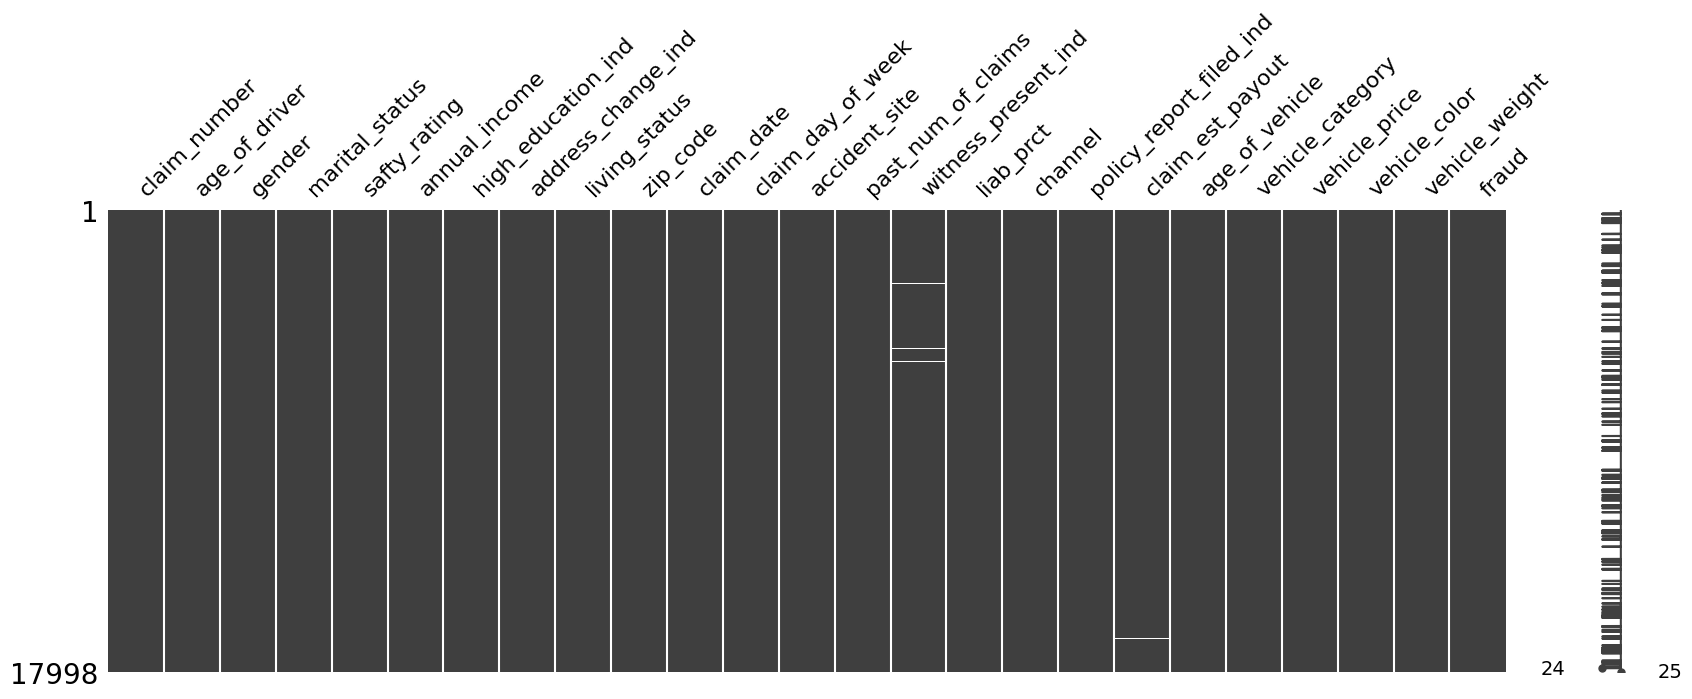

In [25]:
import missingno as mno
mno.matrix(df, figsize = (20,6))
plt.show()

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
claim_number,17998.0,14970.601622,8659.940765,1.000000,7479.250000,14965.500000,22467.750000,30000.00000
age_of_driver,17998.0,43.695466,11.959819,18.000000,35.000000,43.000000,51.000000,229.00000
marital_status,17993.0,0.712722,0.452505,0.000000,0.000000,1.000000,1.000000,1.00000
safty_rating,17998.0,73.562951,15.346807,1.000000,65.000000,76.000000,85.000000,100.00000
annual_income,17998.0,37367.655684,2957.297249,-1.000000,35554.000000,37610.000000,39318.000000,54333.00000
high_education_ind,17998.0,0.699189,0.458623,0.000000,0.000000,1.000000,1.000000,1.00000
address_change_ind,17998.0,0.577286,0.494004,0.000000,0.000000,1.000000,1.000000,1.00000
zip_code,17998.0,49875.595955,29214.655149,0.000000,20111.000000,50028.000000,80038.000000,85083.00000
past_num_of_claims,17998.0,0.505001,0.955504,0.000000,0.000000,0.000000,1.000000,6.00000
witness_present_ind,17866.0,0.232677,0.422550,0.000000,0.000000,0.000000,0.000000,1.00000


In [27]:
# descriptive statistics of object columns

In [28]:
df.describe(include=['O']).T

,count,unique,top,freq
gender,17998,2,M,9414
living_status,17998,2,Own,9969
claim_date,17998,731,9/14/2016,39
claim_day_of_week,17998,7,Saturday,2630
accident_site,17998,3,Local,8768
channel,17998,3,Broker,9633
vehicle_category,17998,3,Compact,6063
vehicle_color,17998,7,black,2620


In [29]:
# Checking for duplicates

In [30]:
df.duplicated().sum()

0

In [31]:
# Implementing Complete Case Analysis


In [32]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['marital_status', 'witness_present_ind', 'claim_est_payout', 'age_of_vehicle']

In [33]:
df.sample(10)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
11376,18908,73,M,1.0,81,42908,1,0,Rent,85030,...,81,Broker,1,2128.890603,6.0,Large,26871.00317,silver,23750.223320,0
16036,26729,35,F,1.0,83,35574,0,1,Rent,50020,...,75,Broker,0,3235.618179,3.0,Medium,15585.14425,black,9460.727863,0
14411,23983,39,F,1.0,64,36629,0,0,Rent,15019,...,99,Broker,0,3761.641684,5.0,Large,30812.78011,other,35976.320150,0
7280,12095,50,M,0.0,63,39120,0,0,Own,80012,...,5,Broker,1,3041.466034,9.0,Medium,10133.03522,black,9445.208642,0
3129,5237,59,M,0.0,86,40787,0,1,Own,15049,...,10,Broker,1,4827.430231,5.0,Large,20524.84689,gray,30492.159290,1
16052,26764,32,F,0.0,79,34654,0,1,Own,15044,...,96,Phone,1,4922.596907,2.0,Large,24570.00676,black,39858.526160,1
7059,11709,30,F,1.0,89,34015,1,0,Rent,50001,...,46,Phone,0,2826.203799,7.0,Large,49904.71649,white,43221.116600,0
14932,24852,29,M,1.0,67,33661,0,1,Rent,80015,...,11,Online,1,3335.585952,2.0,Compact,32466.60357,silver,30227.300890,0
5608,9280,49,M,1.0,63,38926,1,1,Own,20113,...,92,Broker,1,2984.477847,6.0,Compact,10541.34432,blue,22843.281660,0
8795,14611,53,M,0.0,54,39693,1,0,Own,85046,...,74,Broker,1,2874.233576,7.0,Large,24890.20294,blue,15817.695810,0


In [34]:
df.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [35]:
cols

['marital_status', 'witness_present_ind', 'claim_est_payout', 'age_of_vehicle']

In [36]:
# dropping all rows with any null values

In [37]:
new_df = df.dropna()

In [38]:
new_df.shape

(17836, 25)

In [39]:
new_df.isnull().sum()

claim_number               0
age_of_driver              0
gender                     0
marital_status             0
safty_rating               0
annual_income              0
high_education_ind         0
address_change_ind         0
living_status              0
zip_code                   0
claim_date                 0
claim_day_of_week          0
accident_site              0
past_num_of_claims         0
witness_present_ind        0
liab_prct                  0
channel                    0
policy_report_filed_ind    0
claim_est_payout           0
age_of_vehicle             0
vehicle_category           0
vehicle_price              0
vehicle_color              0
vehicle_weight             0
fraud                      0
dtype: int64

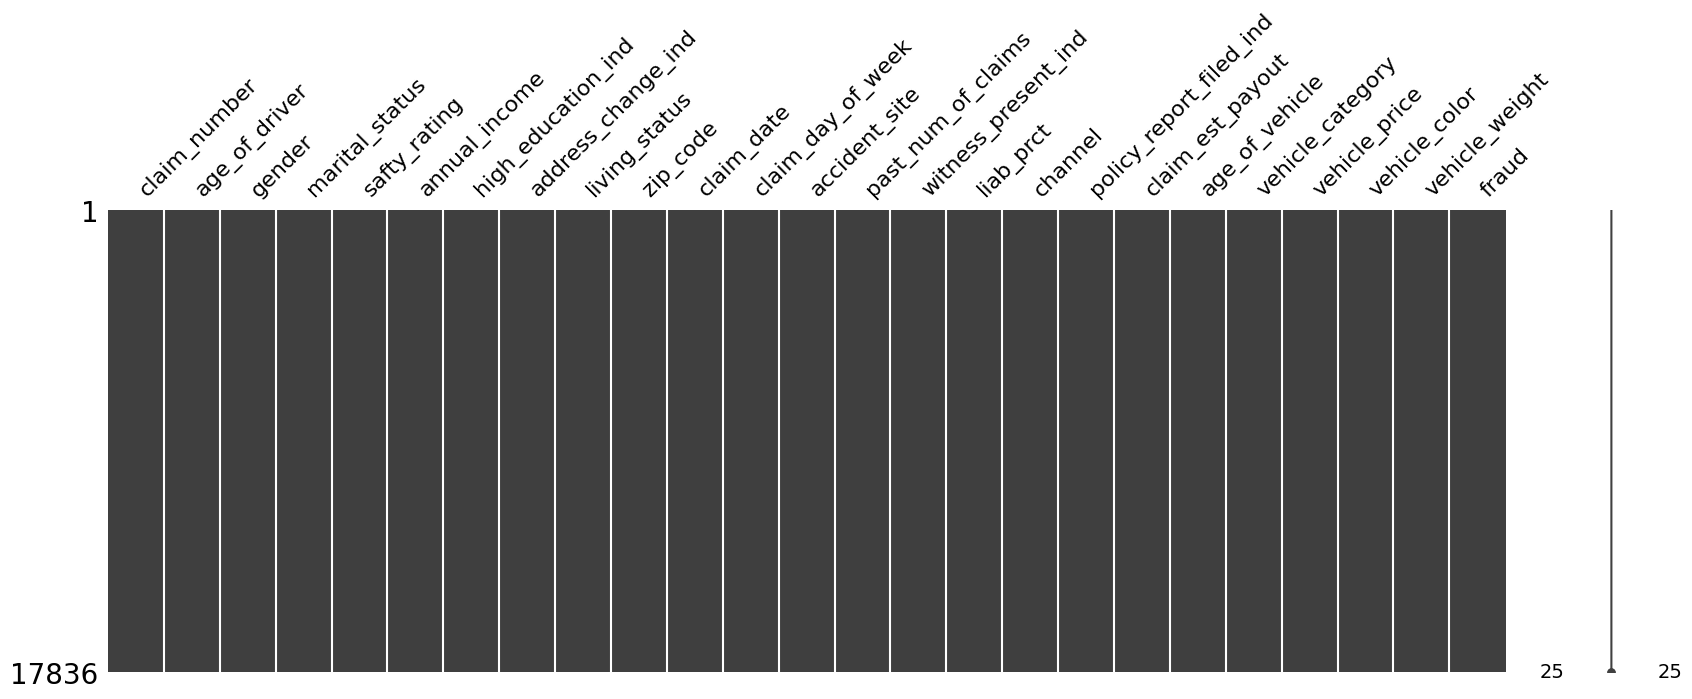

In [40]:
mno.matrix(new_df, figsize = (20,6))
plt.show()

In [41]:
# Checking distributions of the original and edited dataset


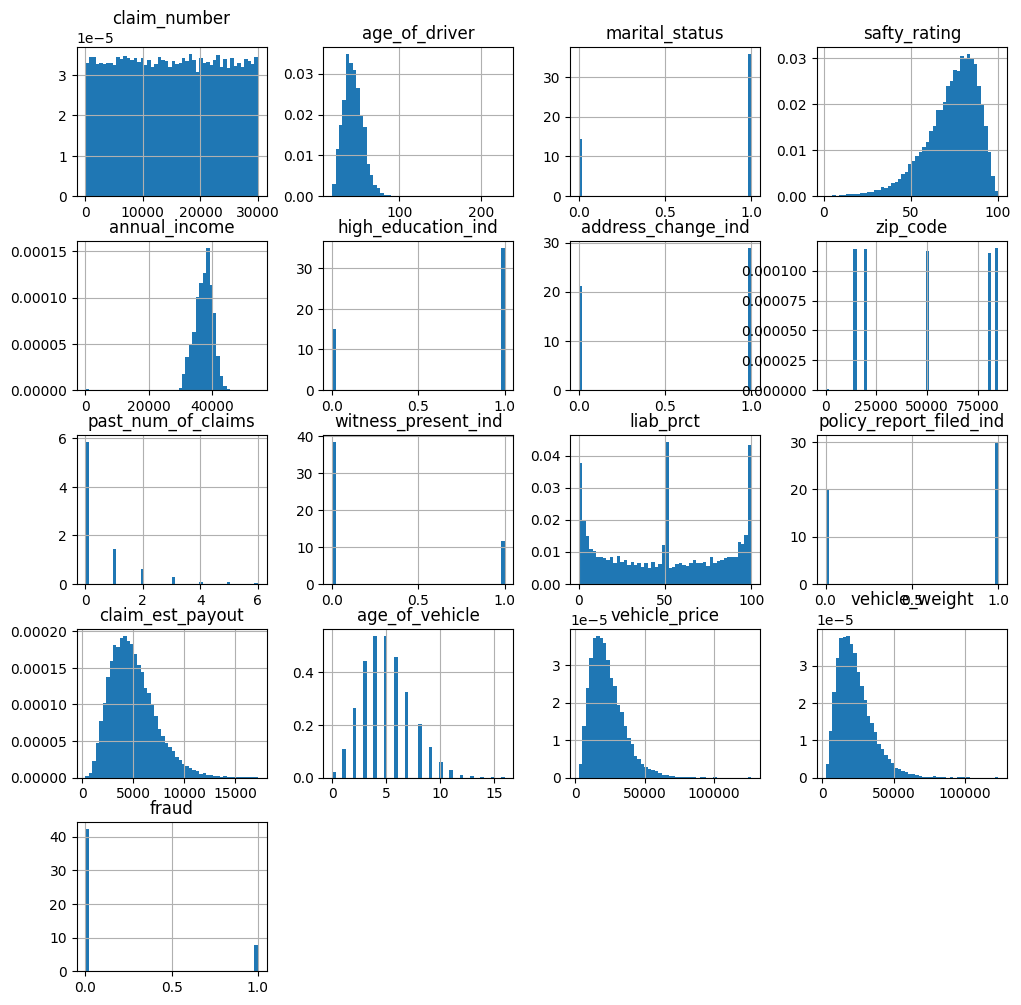

In [42]:
df.hist(bins=50, density=True, figsize = (12,12))
plt.show()

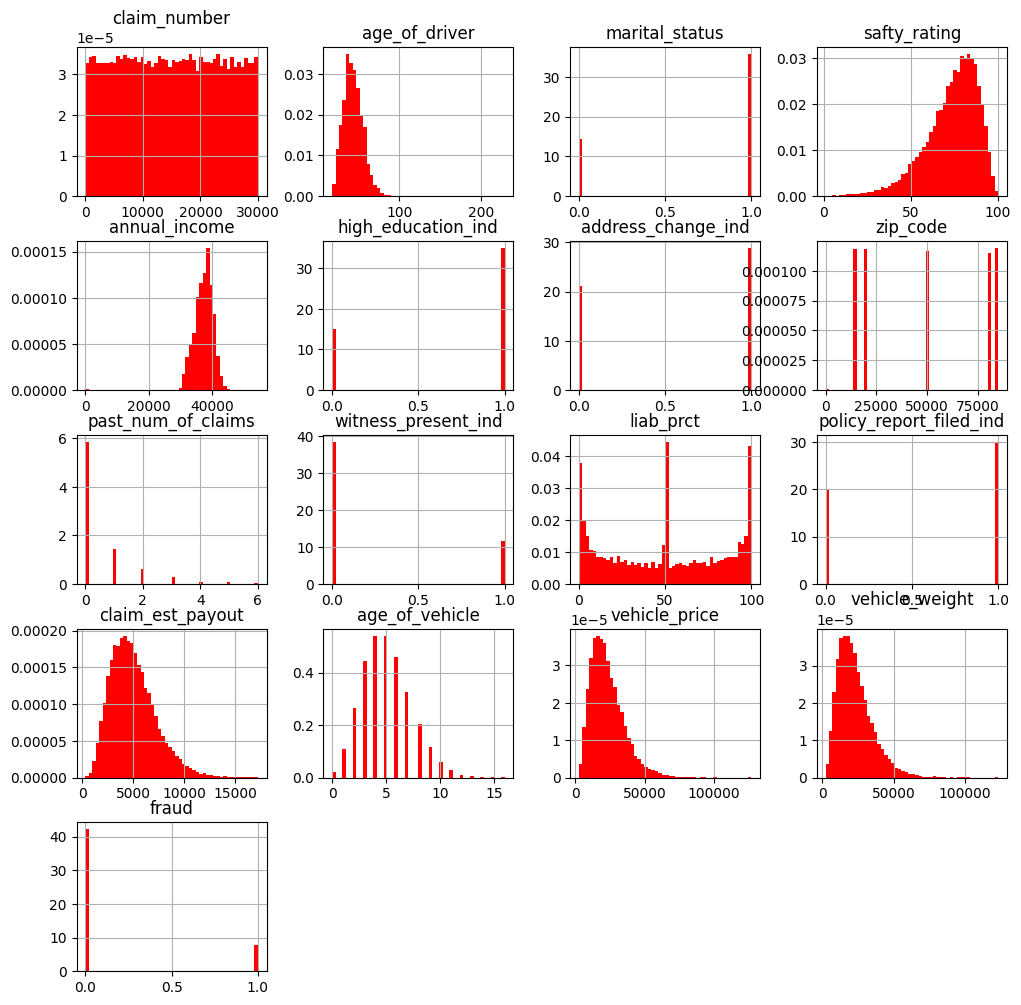

In [43]:
new_df.hist(bins=50, density=True, color = 'red', figsize = (12,12))
plt.show()

In [44]:
# Plotting Feature Distributions
# 1. Histogram
# 2. KDE
# 3. Boxplot

In [45]:
# Numeric Variables

Text(0.5, 0, 'Age')

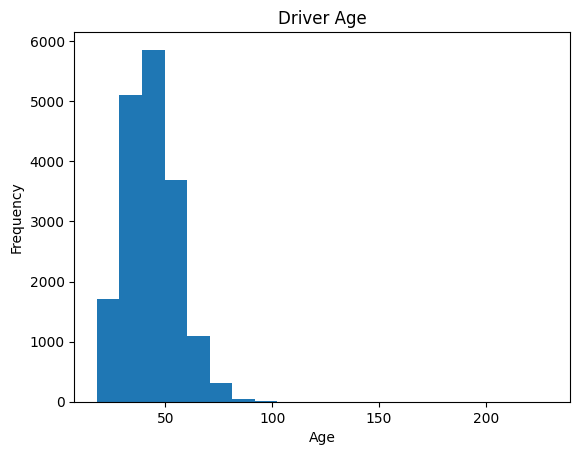

In [46]:
ax = new_df['age_of_driver'].plot(kind='hist', bins=20,title="Driver Age")
ax.set_xlabel('Age')

Text(0.5, 0, 'Age')

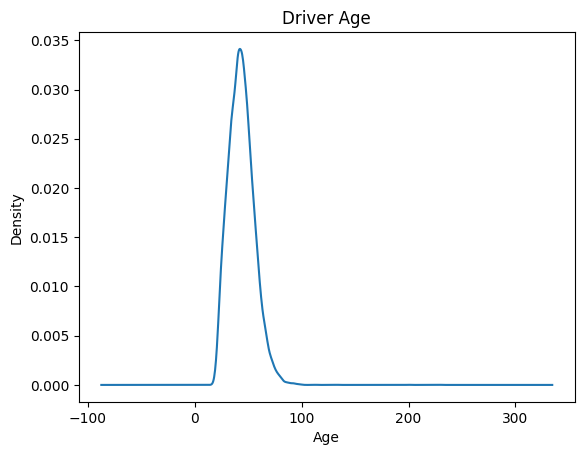

In [47]:
ax = new_df['age_of_driver'].plot(kind='kde',title="Driver Age")
ax.set_xlabel('Age')

Text(0.5, 0, 'Safety Rating')

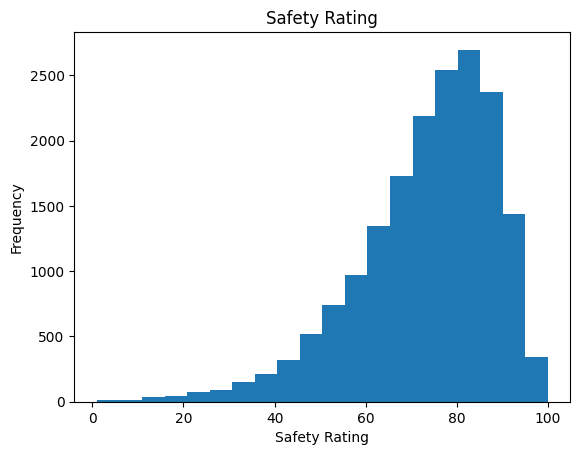

In [48]:
ax = new_df['safty_rating'].plot(kind='hist', bins=20,title="Safety Rating")
ax.set_xlabel('Safety Rating')

Text(0.5, 0, 'Safety Rating')

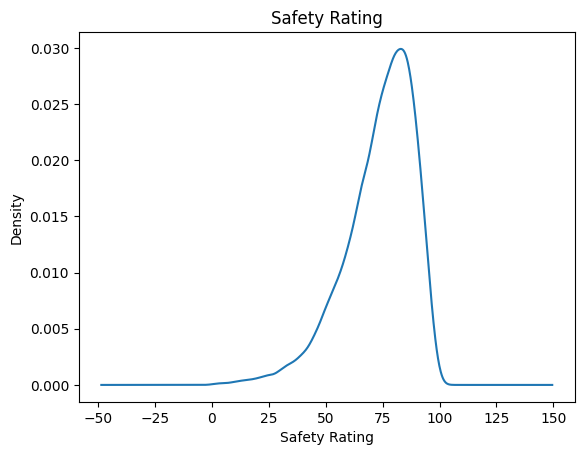

In [49]:
ax = new_df['safty_rating'].plot(kind='kde',title="Safety Rating")
ax.set_xlabel('Safety Rating')

Text(0.5, 0, 'Annual Income')

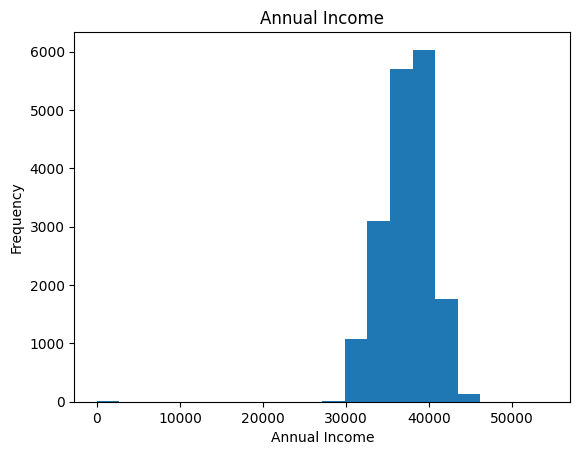

In [50]:
ax = new_df['annual_income'].plot(kind='hist', bins=20,title="Annual Income")
ax.set_xlabel('Annual Income')

Text(0.5, 0, 'Annual Income')

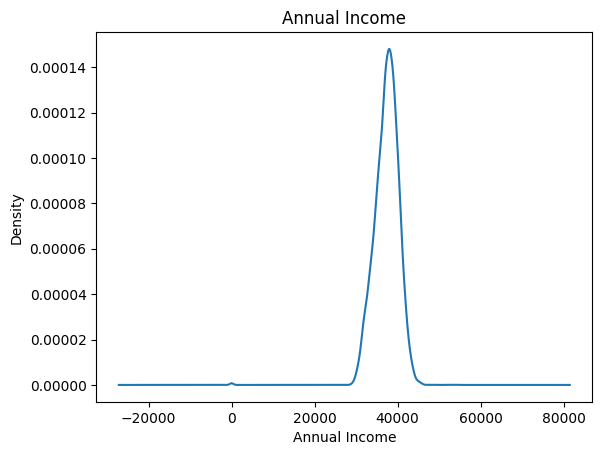

In [51]:
ax = new_df['annual_income'].plot(kind='kde',title="Annual Income")
ax.set_xlabel('Annual Income')

Text(0.5, 0, 'High Education')

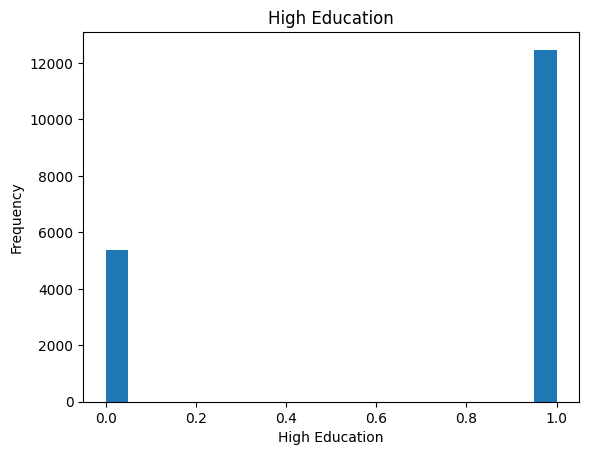

In [52]:
ax = new_df['high_education_ind'].plot(kind='hist',bins=20,title="High Education")
ax.set_xlabel('High Education')

Text(0.5, 0, 'High Education')

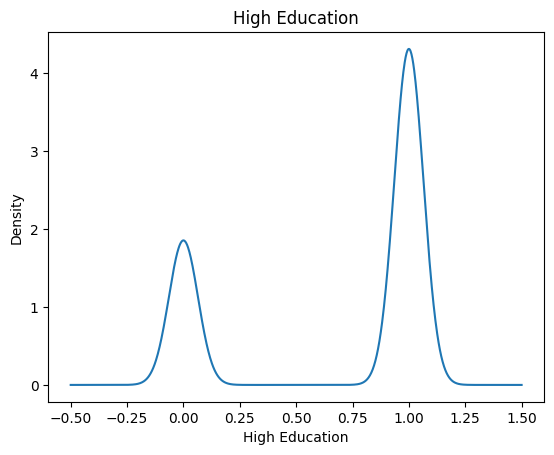

In [53]:
ax = new_df['high_education_ind'].plot(kind='kde',title="High Education")
ax.set_xlabel('High Education')

Text(0.5, 0, 'Address Change')

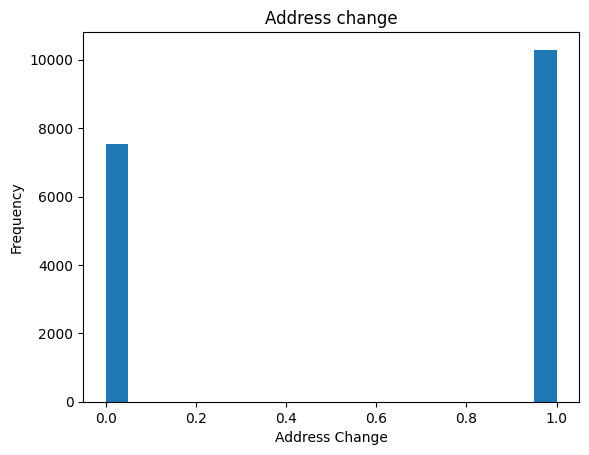

In [54]:
ax = new_df['address_change_ind'].plot(kind='hist',bins=20,title="Address change")
ax.set_xlabel('Address Change')

Text(0.5, 0, 'Address Change')

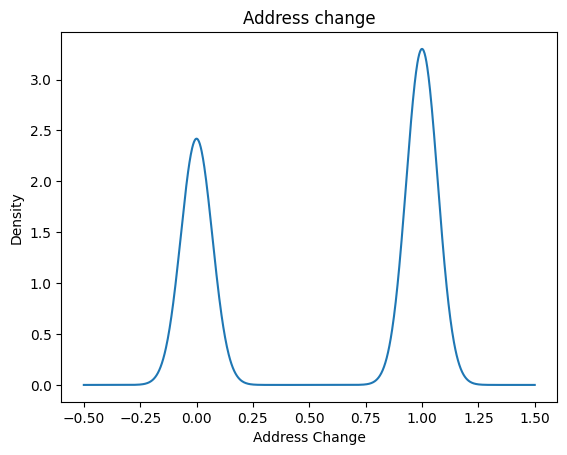

In [55]:
ax = new_df['address_change_ind'].plot(kind='kde',title="Address change")
ax.set_xlabel('Address Change')

Text(0.5, 0, 'Past Claims')

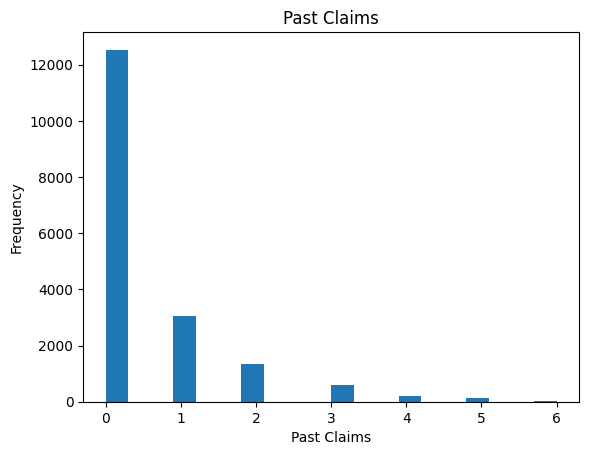

In [56]:
ax = new_df['past_num_of_claims'].plot(kind='hist',bins=20,title="Past Claims")
ax.set_xlabel('Past Claims')

Text(0.5, 0, 'Past Claims')

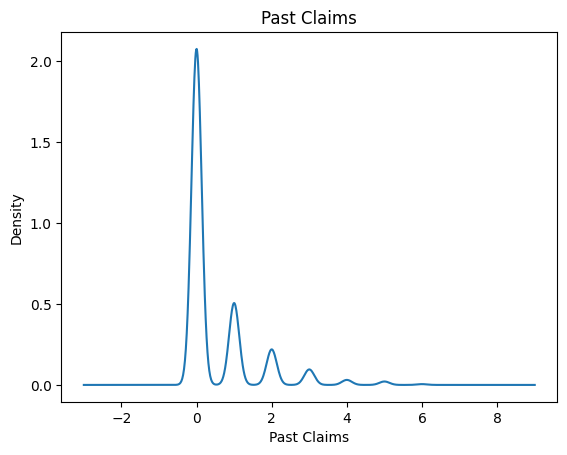

In [57]:
ax = new_df['past_num_of_claims'].plot(kind='kde',title="Past Claims")
ax.set_xlabel('Past Claims')

Text(0.5, 0, 'Liability')

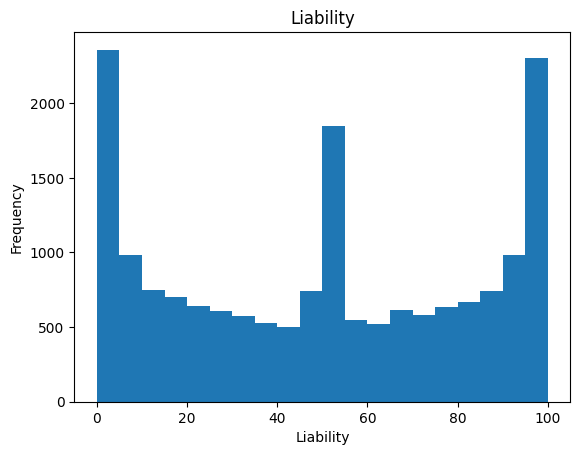

In [58]:
ax = new_df['liab_prct'].plot(kind='hist',bins=20,title="Liability")
ax.set_xlabel('Liability')

Text(0.5, 0, 'Policy Report Filed')

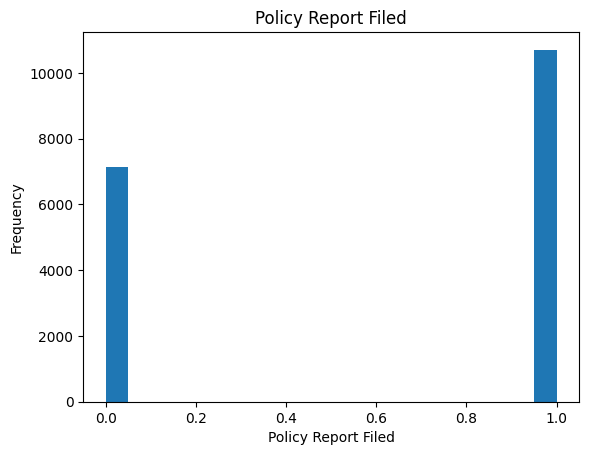

In [59]:
ax = new_df['policy_report_filed_ind'].plot(kind='hist',bins=20,title="Policy Report Filed")
ax.set_xlabel('Policy Report Filed')

Text(0.5, 0, 'Policy Report Filed')

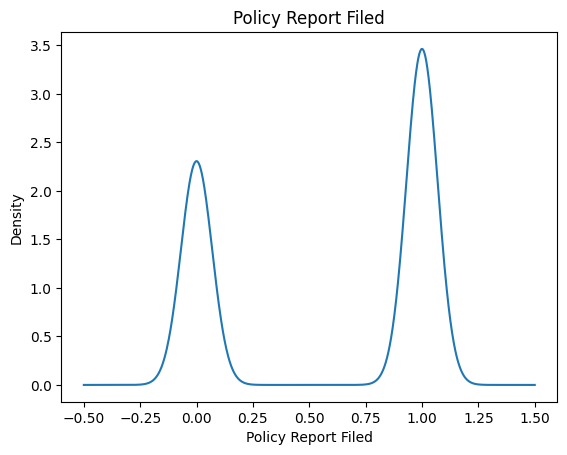

In [60]:
ax = new_df['policy_report_filed_ind'].plot(kind='kde',title="Policy Report Filed")
ax.set_xlabel('Policy Report Filed')

Text(0.5, 0, 'Fraud')

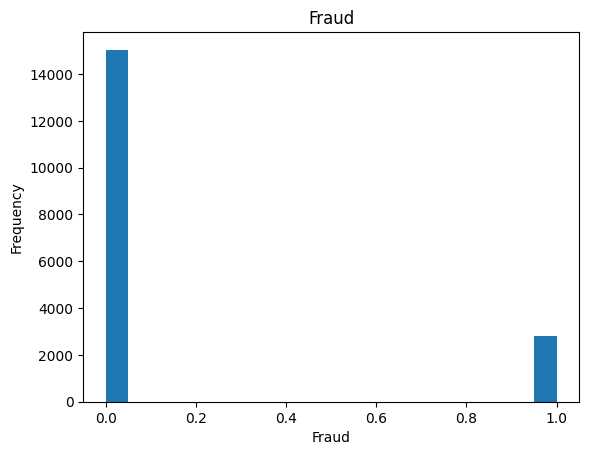

In [61]:
ax = new_df['fraud'].plot(kind='hist',bins=20,title="Fraud")
ax.set_xlabel('Fraud')

Text(0.5, 0, 'Fraud')

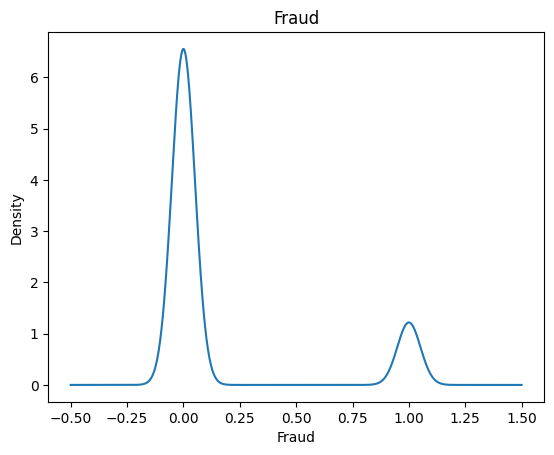

In [62]:
ax = new_df['fraud'].plot(kind='kde',title="Fraud")
ax.set_xlabel('Fraud')

In [63]:
# Categorical Variables

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

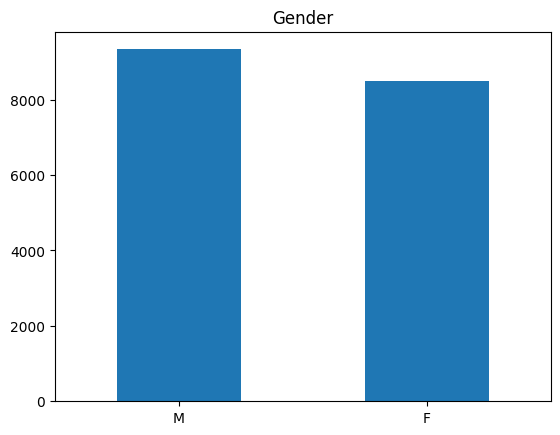

In [64]:
ax = new_df['gender'].value_counts().plot(kind='bar',title="Gender")
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, '1.0'), Text(1, 0, '0.0')])

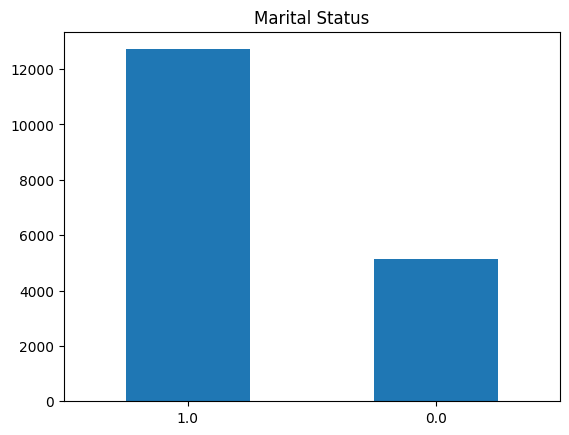

In [65]:
ax = new_df['marital_status'].value_counts().plot(kind='bar',title="Marital Status")
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, 'Own'), Text(1, 0, 'Rent')])

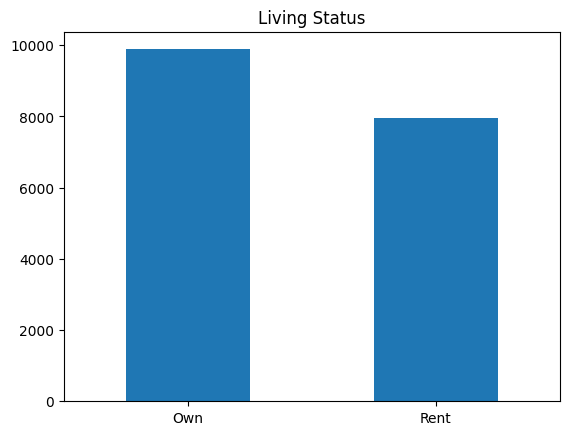

In [66]:
ax = new_df['living_status'].value_counts().plot(kind='bar',title="Living Status")
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Monday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

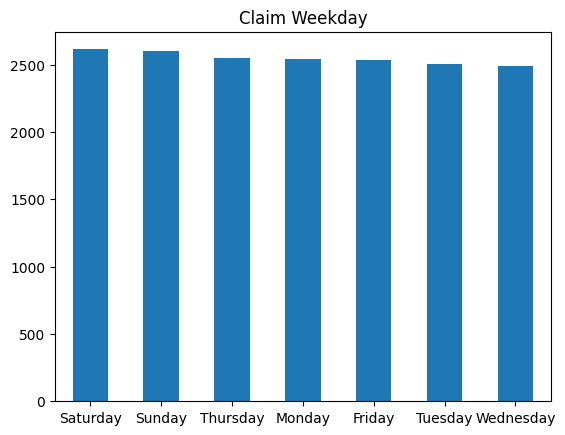

In [67]:
ax = new_df['claim_day_of_week'].value_counts().plot(kind='bar',title="Claim Weekday")
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Local'), Text(1, 0, 'Parking Lot'), Text(2, 0, 'Highway')])

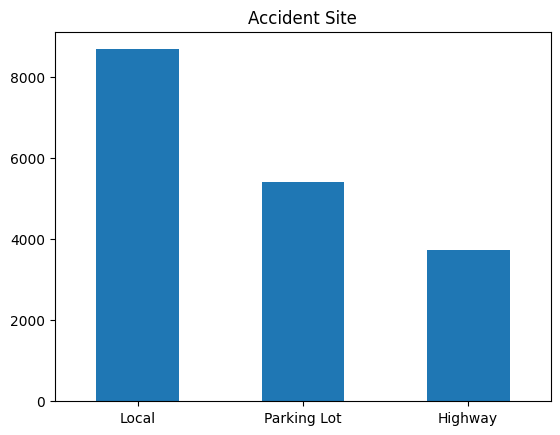

In [68]:
ax = new_df['accident_site'].value_counts().plot(kind='bar',title="Accident Site")
plt.xticks(rotation = 0)

(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

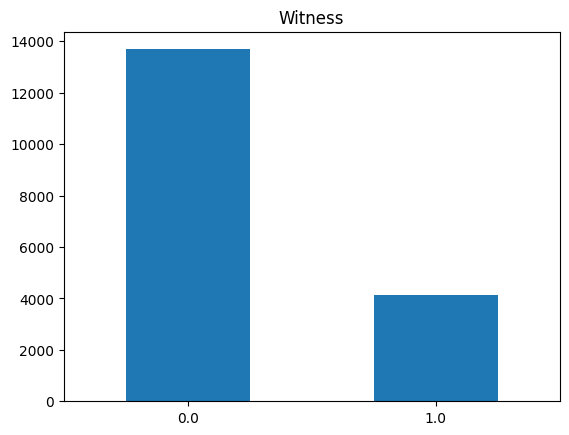

In [69]:
ax = new_df['witness_present_ind'].value_counts().plot(kind='bar',title="Witness")
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Broker'), Text(1, 0, 'Phone'), Text(2, 0, 'Online')])

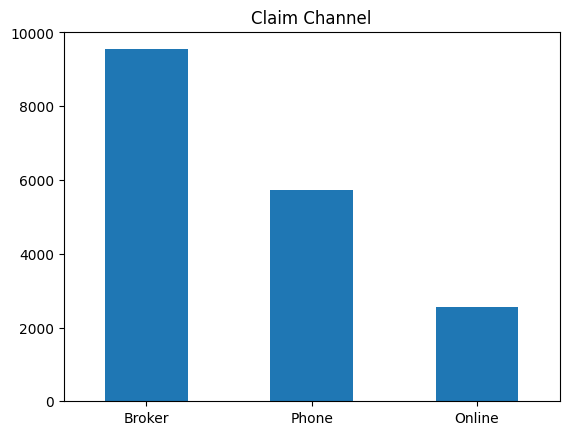

In [70]:
ax = new_df['channel'].value_counts().plot(kind='bar',title="Claim Channel")
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'black'),
  Text(1, 0, 'silver'),
  Text(2, 0, 'white'),
  Text(3, 0, 'red'),
  Text(4, 0, 'gray'),
  Text(5, 0, 'blue'),
  Text(6, 0, 'other')])

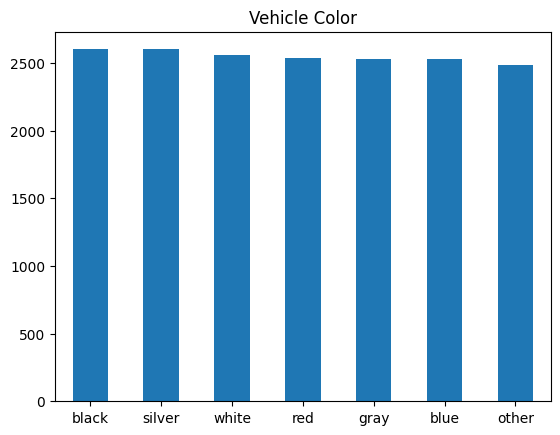

In [71]:
ax = new_df['vehicle_color'].value_counts().plot(kind='bar',title="Vehicle Color")
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Compact'), Text(1, 0, 'Large'), Text(2, 0, 'Medium')])

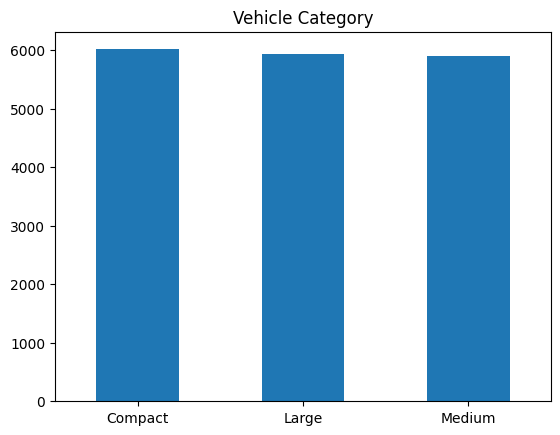

In [72]:
ax = new_df['vehicle_category'].value_counts().plot(kind='bar',title="Vehicle Category")
plt.xticks(rotation = 0)

In [73]:
# Dropping unnecessary columns from the dataframe

In [74]:
sub_df = new_df.drop(labels=['claim_number','safty_rating','zip_code','claim_date','liab_prct','vehicle_weight'], axis = 1)

In [75]:
sub_df.dtypes

age_of_driver                int64
gender                      object
marital_status             float64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
fraud                        int64
dtype: object

In [76]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17836 entries, 0 to 17997
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age_of_driver            17836 non-null  int64  
 1   gender                   17836 non-null  object 
 2   marital_status           17836 non-null  float64
 3   annual_income            17836 non-null  int64  
 4   high_education_ind       17836 non-null  int64  
 5   address_change_ind       17836 non-null  int64  
 6   living_status            17836 non-null  object 
 7   claim_day_of_week        17836 non-null  object 
 8   accident_site            17836 non-null  object 
 9   past_num_of_claims       17836 non-null  int64  
 10  witness_present_ind      17836 non-null  float64
 11  channel                  17836 non-null  object 
 12  policy_report_filed_ind  17836 non-null  int64  
 13  claim_est_payout         17836 non-null  float64
 14  age_of_vehicle        

In [77]:
# 8 columns have been dropped due to their irrelevance in classification

In [78]:
# Feature Relationships. i.e. Bi-variate and Multivariate Analysis
# 1. Scatterplot
# 2. Heatmap correlation
# 3. Pairplot

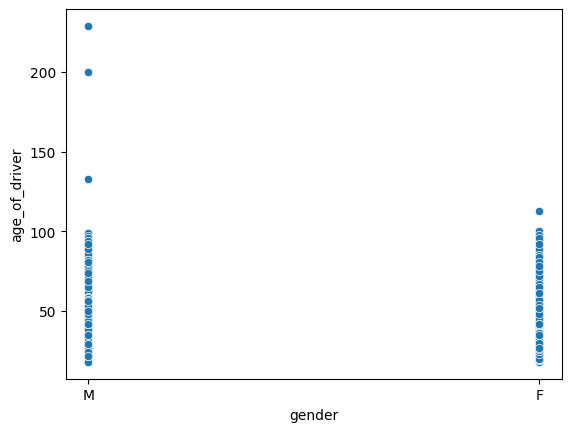

In [79]:
%matplotlib inline
sns.scatterplot(x='gender',y='age_of_driver', data=sub_df)
plt.show()

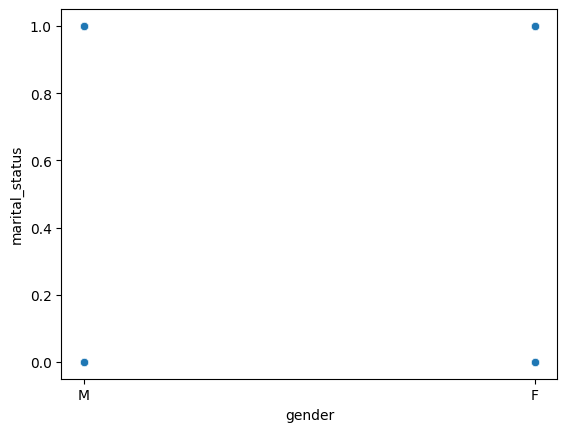

In [80]:

sns.scatterplot(x='gender',y='marital_status', data=sub_df)
plt.show()

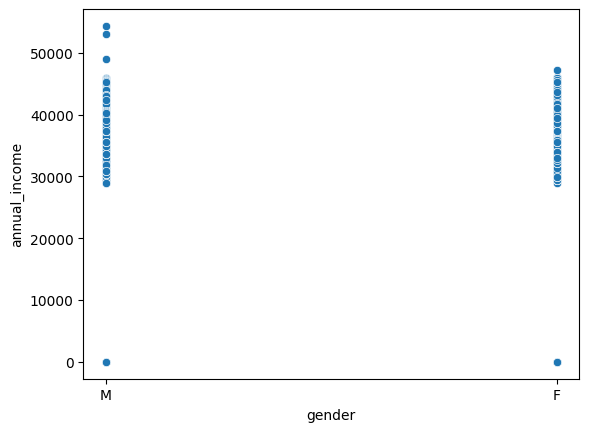

In [81]:
sns.scatterplot(x='gender',y='annual_income', data=sub_df)
plt.show()

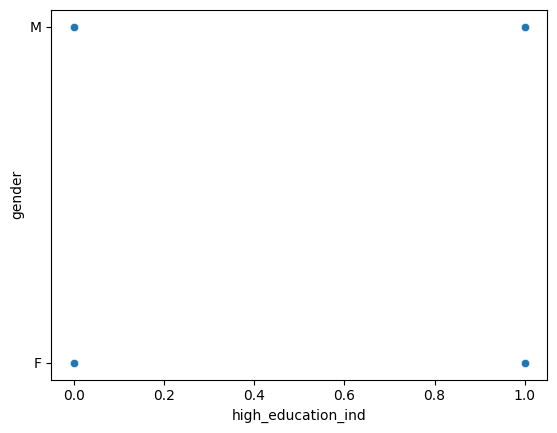

In [82]:
sns.scatterplot(x='high_education_ind',y='gender', data=sub_df)
plt.show()

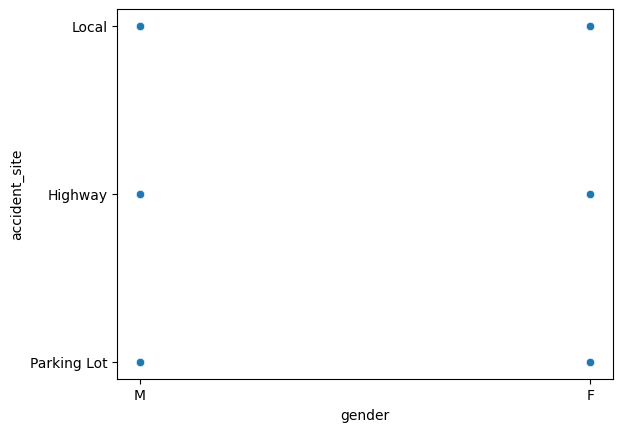

In [83]:
sns.scatterplot(x='gender',y='accident_site', data=sub_df)
plt.show()

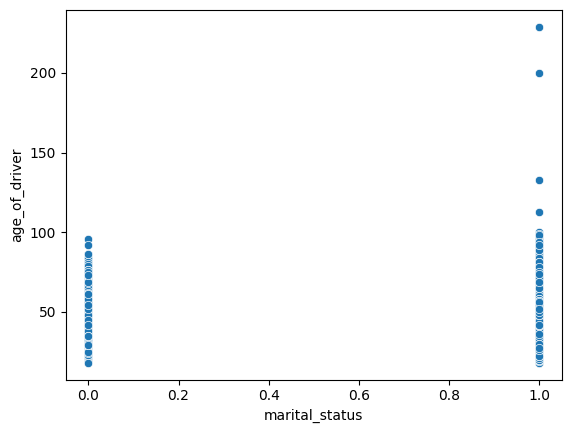

In [84]:
sns.scatterplot(x='marital_status',y='age_of_driver', data=sub_df)
plt.show()

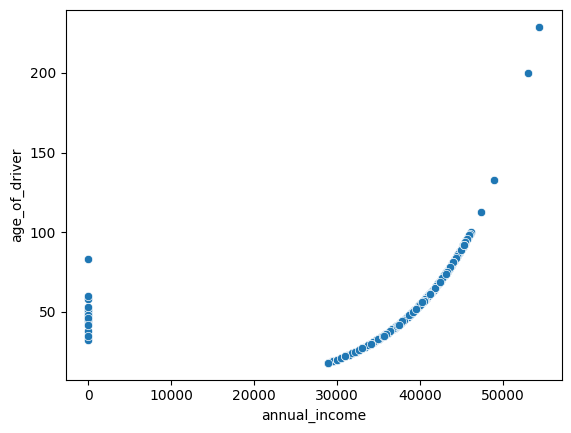

In [85]:
sns.scatterplot(x='annual_income',y='age_of_driver', data=sub_df)
plt.show()

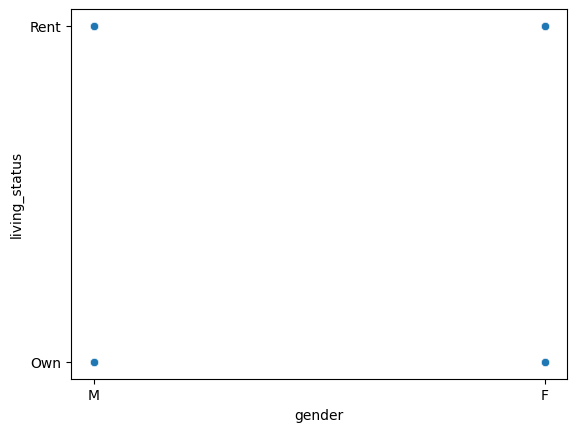

In [86]:
sns.scatterplot(x='gender',y='living_status', data=sub_df)
plt.show()

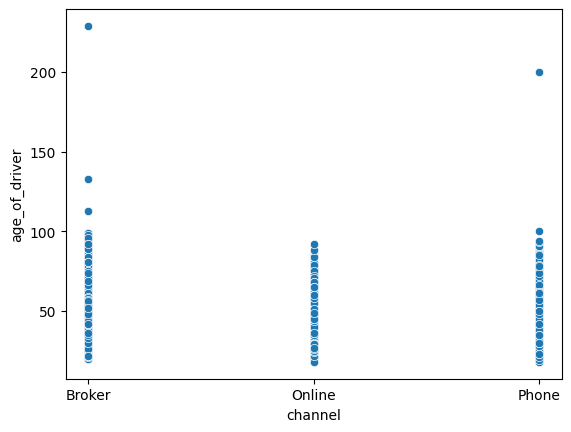

In [87]:
sns.scatterplot(x='channel',y='age_of_driver', data=sub_df)
plt.show()

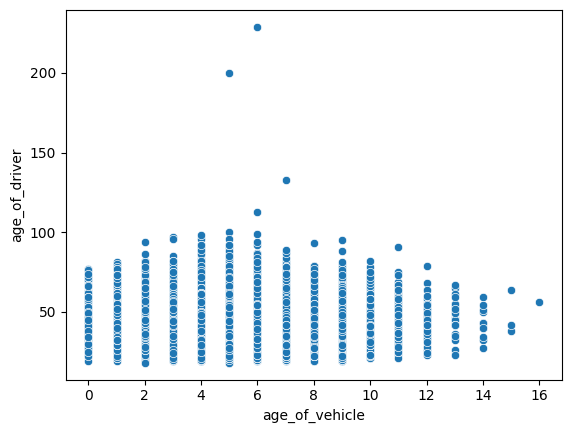

In [88]:
sns.scatterplot(x='age_of_vehicle',y='age_of_driver', data=sub_df)
plt.show()

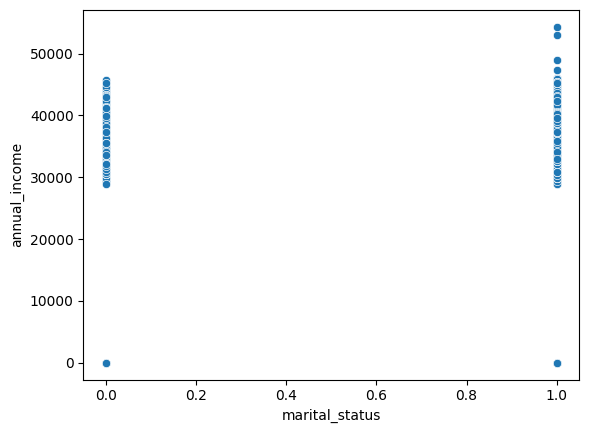

In [89]:
sns.scatterplot(x='marital_status',y='annual_income', data=sub_df)
plt.show()

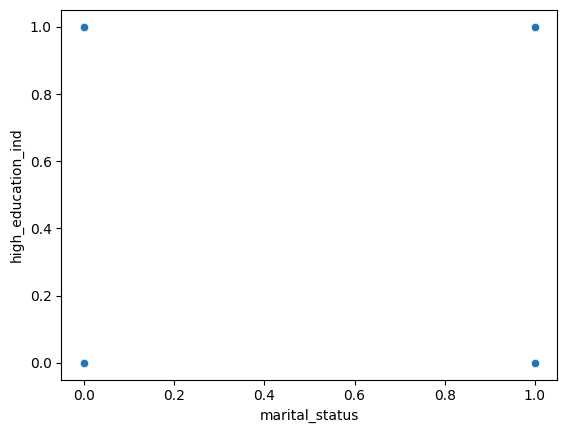

In [90]:
sns.scatterplot(x='marital_status',y='high_education_ind', data=sub_df)
plt.show()

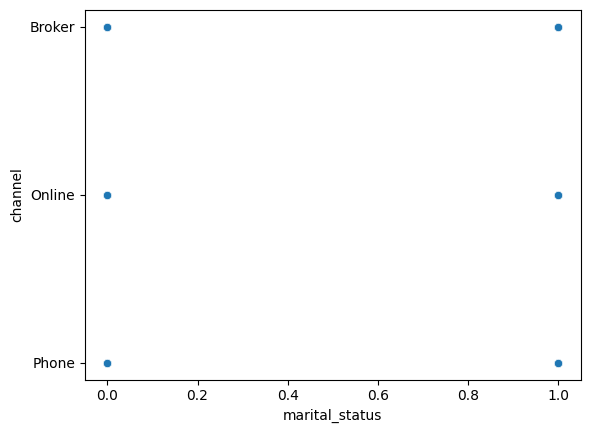

In [91]:
sns.scatterplot(x='marital_status',y='channel', data=sub_df)
plt.show()

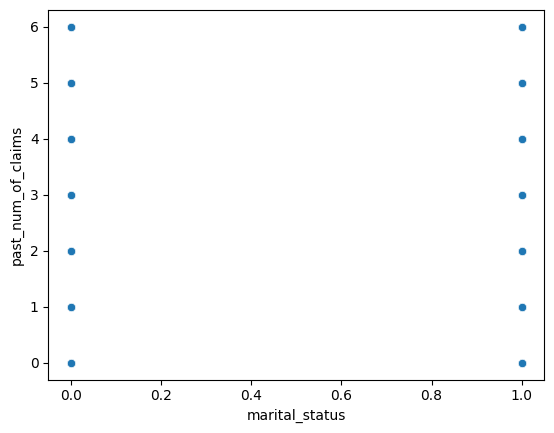

In [92]:
sns.scatterplot(x='marital_status',y='past_num_of_claims', data=sub_df)
plt.show()

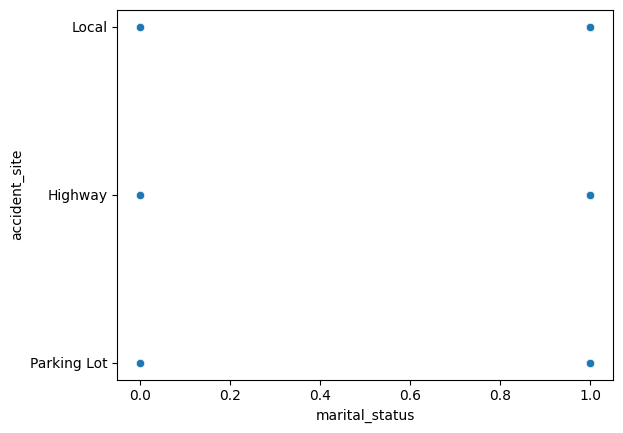

In [93]:
sns.scatterplot(x='marital_status',y='accident_site', data=sub_df)
plt.show()

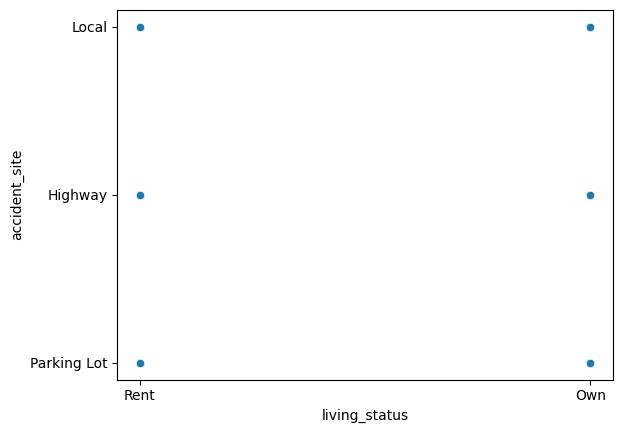

In [94]:
sns.scatterplot(x='living_status',y='accident_site', data=sub_df)
plt.show()

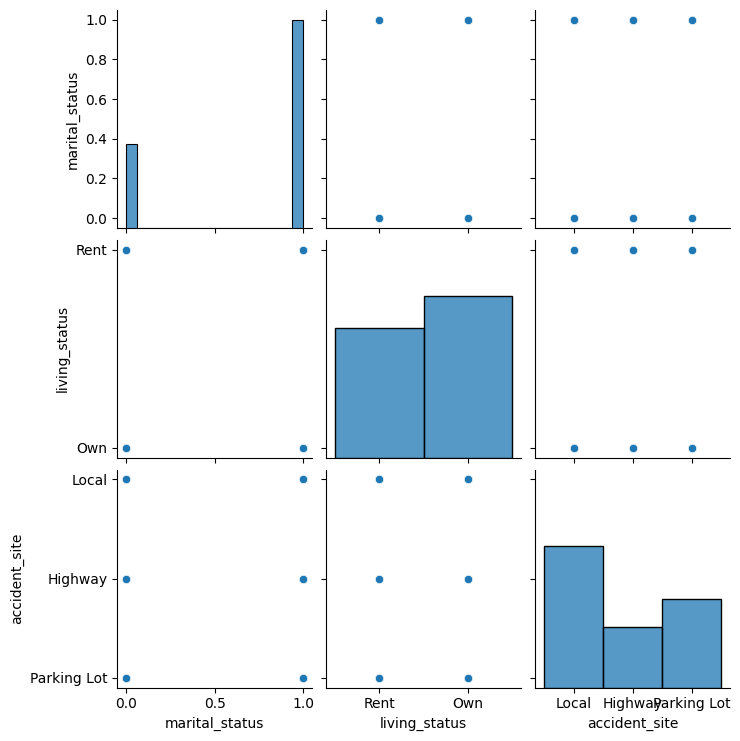

In [95]:
sns.pairplot(sub_df, vars=['marital_status', 'living_status','accident_site'])
plt.show()

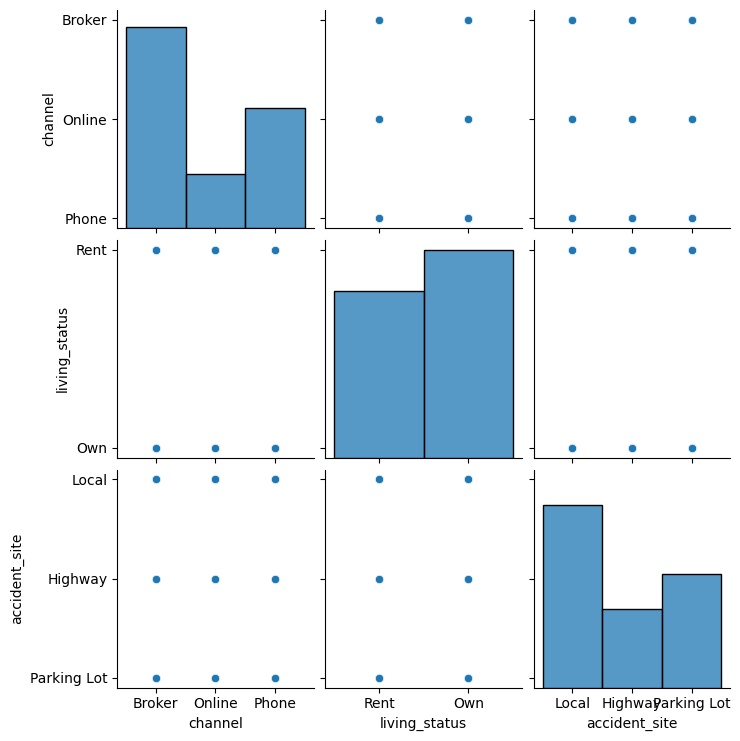

In [96]:
sns.pairplot(sub_df, vars=['channel', 'living_status','accident_site'])
plt.show()

In [97]:
# No meaningful correlations found after studying the auto EDA report

In [98]:
# Removing outliers from the dataset


In [99]:
min_threshold, max_threshold = sub_df.age_of_driver.quantile([0.001,0.999])
min_threshold, max_threshold

(20.0, 92.0)

In [100]:
sub_df[sub_df.age_of_driver< min_threshold]

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
257,19,F,0.0,29447,1,1,Rent,Thursday,Local,0,0.0,Online,1,1647.210648,6.0,Medium,40025.701100,red,1
645,19,M,1.0,29441,0,1,Rent,Saturday,Local,1,1.0,Online,1,7255.337702,7.0,Large,21698.172170,blue,0
1428,19,M,1.0,29444,0,0,Rent,Thursday,Parking Lot,1,0.0,Online,1,3291.963110,4.0,Compact,17421.742280,red,0
3144,19,M,0.0,29451,0,0,Rent,Tuesday,Local,3,0.0,Online,1,4888.918133,9.0,Large,13123.972290,silver,1
5570,19,F,1.0,29434,1,1,Rent,Friday,Parking Lot,1,0.0,Online,1,6041.104563,4.0,Compact,11518.122800,gray,0
5690,19,M,1.0,29453,0,1,Rent,Sunday,Local,0,0.0,Phone,0,6374.982139,0.0,Medium,8684.645496,silver,1
6074,19,F,1.0,29444,1,1,Rent,Wednesday,Parking Lot,1,0.0,Phone,0,5510.854482,4.0,Medium,22929.878380,gray,0
6785,18,F,1.0,28906,0,0,Rent,Wednesday,Local,0,0.0,Phone,1,5496.510851,5.0,Large,6143.200906,other,0
6880,19,F,1.0,29420,1,0,Rent,Friday,Local,1,0.0,Online,0,3732.413254,1.0,Medium,32306.726520,other,0
9262,19,M,0.0,29450,0,1,Own,Saturday,Parking Lot,0,0.0,Online,0,7059.919642,8.0,Medium,22259.446080,black,1


In [101]:
sub_df[sub_df.age_of_driver> max_threshold]

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
25,200,M,1.0,52988,1,1,Rent,Saturday,Highway,0,0.0,Phone,1,5782.266662,5.0,Compact,21503.302070,other,0
70,133,M,1.0,48905,1,1,Own,Wednesday,Local,0,0.0,Broker,1,5922.919482,7.0,Medium,7626.946942,blue,0
663,100,F,1.0,46066,1,1,Own,Friday,Local,0,1.0,Phone,1,4112.137481,5.0,Medium,20972.912580,white,0
1217,229,M,1.0,54333,1,0,Rent,Monday,Highway,2,0.0,Broker,1,5025.442762,6.0,Compact,29133.038610,gray,1
2037,99,M,1.0,45960,1,1,Own,Saturday,Local,2,0.0,Broker,0,4194.262860,6.0,Medium,23684.601050,black,0
3881,96,F,1.0,45626,0,0,Own,Thursday,Local,0,1.0,Broker,0,5047.427328,4.0,Medium,20243.872290,silver,0
3989,95,F,1.0,45566,0,1,Rent,Thursday,Parking Lot,1,0.0,Broker,1,6169.218754,9.0,Compact,77435.144170,red,1
4584,97,M,1.0,45729,0,1,Own,Sunday,Highway,1,0.0,Broker,0,3290.236373,3.0,Medium,20466.852360,blue,0
6396,96,M,1.0,45647,0,1,Own,Saturday,Local,0,0.0,Broker,1,3278.592086,5.0,Medium,28022.526550,red,0
6431,94,M,1.0,45433,1,1,Rent,Thursday,Local,3,0.0,Broker,1,10069.289970,2.0,Medium,13966.825210,white,1


In [102]:
min_threshold_income, max_threshold_income = sub_df.annual_income.quantile([0.001,0.999])
min_threshold_income, max_threshold_income

(29431.69, 45209.48500000001)

In [103]:
sub_df[sub_df.annual_income < min_threshold_income]

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
3442,50,M,0.0,-1,1,0,Own,Monday,Local,0,1.0,Phone,0,2888.135487,8.0,Compact,33991.880900,silver,0
5449,44,F,1.0,-1,0,1,Rent,Tuesday,Local,1,0.0,Broker,1,6652.437522,6.0,Medium,32016.020890,blue,1
6785,18,F,1.0,28906,0,0,Rent,Wednesday,Local,0,0.0,Phone,1,5496.510851,5.0,Large,6143.200906,other,0
6880,19,F,1.0,29420,1,0,Rent,Friday,Local,1,0.0,Online,0,3732.413254,1.0,Medium,32306.726520,other,0
7347,58,F,1.0,-1,0,1,Rent,Sunday,Highway,0,0.0,Phone,1,5420.918014,3.0,Compact,16014.081880,gray,0
7467,38,F,0.0,-1,0,0,Own,Thursday,Local,0,1.0,Broker,1,6582.836630,4.0,Large,29264.923920,red,0
8193,83,F,0.0,-1,1,1,Rent,Saturday,Local,0,0.0,Broker,0,6859.105352,5.0,Compact,42317.138310,other,0
9385,51,M,1.0,-1,0,1,Own,Sunday,Local,0,0.0,Online,1,3891.639774,4.0,Compact,17089.165650,silver,0
9628,60,F,1.0,-1,1,1,Own,Wednesday,Local,0,0.0,Phone,1,2807.377736,6.0,Large,32355.553770,blue,0
10539,53,F,0.0,-1,1,1,Own,Wednesday,Local,0,1.0,Phone,1,1203.426213,5.0,Compact,12693.480130,silver,0


In [104]:
sub_df[sub_df.annual_income > max_threshold_income]

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
25,200,M,1.0,52988,1,1,Rent,Saturday,Highway,0,0.0,Phone,1,5782.266662,5.0,Compact,21503.302070,other,0
70,133,M,1.0,48905,1,1,Own,Wednesday,Local,0,0.0,Broker,1,5922.919482,7.0,Medium,7626.946942,blue,0
663,100,F,1.0,46066,1,1,Own,Friday,Local,0,1.0,Phone,1,4112.137481,5.0,Medium,20972.912580,white,0
1217,229,M,1.0,54333,1,0,Rent,Monday,Highway,2,0.0,Broker,1,5025.442762,6.0,Compact,29133.038610,gray,1
2037,99,M,1.0,45960,1,1,Own,Saturday,Local,2,0.0,Broker,0,4194.262860,6.0,Medium,23684.601050,black,0
3881,96,F,1.0,45626,0,0,Own,Thursday,Local,0,1.0,Broker,0,5047.427328,4.0,Medium,20243.872290,silver,0
3989,95,F,1.0,45566,0,1,Rent,Thursday,Parking Lot,1,0.0,Broker,1,6169.218754,9.0,Compact,77435.144170,red,1
4584,97,M,1.0,45729,0,1,Own,Sunday,Highway,1,0.0,Broker,0,3290.236373,3.0,Medium,20466.852360,blue,0
4788,92,F,1.0,45219,1,0,Own,Thursday,Local,0,0.0,Phone,0,2610.091312,4.0,Compact,39728.693360,blue,0
6396,96,M,1.0,45647,0,1,Own,Saturday,Local,0,0.0,Broker,1,3278.592086,5.0,Medium,28022.526550,red,0


In [105]:
sub_df.shape

(17836, 19)

In [106]:
df_subset = sub_df[(sub_df.age_of_driver < max_threshold) & (sub_df.age_of_driver > min_threshold) \
                  & (sub_df.annual_income < max_threshold_income) & (sub_df.annual_income > min_threshold_income)]
df_subset.shape

(17748, 19)

In [107]:
df_subset.describe()

,age_of_driver,marital_status,annual_income,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,fraud
count,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000,17748.000000
mean,43.672865,0.712925,37407.832545,0.699459,0.576966,0.504508,0.232421,0.599786,4975.326991,5.010198,23093.789007,0.156468
std,11.629386,0.452409,2709.155621,0.458506,0.494055,0.955381,0.422388,0.489955,2217.969200,2.260481,11999.056910,0.363309
min,21.000000,0.000000,30423.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,0.000000
25%,35.000000,0.000000,35557.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3337.012827,3.000000,14279.091027,0.000000
50%,43.000000,1.000000,37611.000000,1.000000,1.000000,0.000000,0.000000,1.000000,4668.347788,5.000000,20948.260455,0.000000
75%,51.000000,1.000000,39318.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6256.510980,6.000000,29573.932705,0.000000
max,91.000000,1.000000,45121.000000,1.000000,1.000000,6.000000,1.000000,1.000000,17218.345010,16.000000,127063.506000,1.000000


In [108]:
df_subset.columns

Index(['age_of_driver', 'gender', 'marital_status', 'annual_income',
       'high_education_ind', 'address_change_ind', 'living_status',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'channel', 'policy_report_filed_ind',
       'claim_est_payout', 'age_of_vehicle', 'vehicle_category',
       'vehicle_price', 'vehicle_color', 'fraud'],
      dtype='object')

In [109]:
df_subset.sample(10)

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
13598,31,M,1.0,34331,1,0,Own,Thursday,Local,0,0.0,Broker,1,5301.254314,4.0,Medium,28776.54558,red,0
3936,45,M,1.0,38067,1,1,Rent,Tuesday,Parking Lot,0,0.0,Phone,1,5739.497188,3.0,Medium,29468.56078,gray,0
423,35,M,1.0,35546,0,1,Own,Thursday,Parking Lot,0,0.0,Phone,1,3924.688046,5.0,Large,26404.13545,red,0
7172,44,F,1.0,37835,1,1,Own,Wednesday,Local,1,0.0,Broker,1,5796.133995,2.0,Compact,22665.45450,silver,0
16283,40,M,0.0,36882,1,1,Own,Tuesday,Local,0,0.0,Phone,1,2984.423826,8.0,Large,15140.24462,black,0
10150,44,F,1.0,37852,1,1,Rent,Sunday,Local,2,1.0,Phone,1,10670.163950,6.0,Compact,31695.45125,blue,0
11165,29,M,1.0,33668,1,1,Rent,Wednesday,Highway,0,0.0,Online,0,3142.187302,7.0,Large,23716.91694,black,1
13354,30,M,1.0,34012,1,1,Own,Tuesday,Highway,0,0.0,Broker,1,5220.727483,2.0,Large,62415.29398,black,1
103,56,F,1.0,40258,1,1,Rent,Friday,Parking Lot,0,0.0,Broker,1,6148.332688,4.0,Large,13896.45906,white,0
2004,43,F,0.0,37612,1,0,Own,Monday,Local,0,1.0,Broker,0,7917.360172,4.0,Large,29354.62191,gray,0


In [110]:
label_encoder = LabelEncoder()

In [111]:
print(label_encoder)

LabelEncoder()


In [112]:
df_subset['gender'] = label_encoder.fit_transform(df_subset['gender'])


C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\210517183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['gender'] = label_encoder.fit_transform(df_subset['gender'])


In [113]:
df_subset.head()

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
0,46,1,1.0,38301,1,1,Rent,Friday,Local,1,0.0,Broker,0,7530.940993,9.0,Compact,12885.45235,white,0
1,21,0,0.0,30445,0,1,Rent,Thursday,Highway,1,1.0,Online,0,2966.024895,4.0,Large,29429.45218,white,0
2,49,0,0.0,38923,0,1,Own,Tuesday,Local,0,0.0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,1
3,58,0,1.0,40605,1,0,Own,Thursday,Local,3,0.0,Broker,1,6169.747994,4.0,Medium,13198.27344,other,1
4,38,1,1.0,36380,1,0,Rent,Tuesday,Highway,0,1.0,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,0


In [114]:
df_subset['living_status'] = label_encoder.fit_transform(df_subset['living_status'])

C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\2446649076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['living_status'] = label_encoder.fit_transform(df_subset['living_status'])


In [115]:
df_subset.head()

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
0,46,1,1.0,38301,1,1,1,Friday,Local,1,0.0,Broker,0,7530.940993,9.0,Compact,12885.45235,white,0
1,21,0,0.0,30445,0,1,1,Thursday,Highway,1,1.0,Online,0,2966.024895,4.0,Large,29429.45218,white,0
2,49,0,0.0,38923,0,1,0,Tuesday,Local,0,0.0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,1
3,58,0,1.0,40605,1,0,0,Thursday,Local,3,0.0,Broker,1,6169.747994,4.0,Medium,13198.27344,other,1
4,38,1,1.0,36380,1,0,1,Tuesday,Highway,0,1.0,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,0


In [116]:
df_subset['accident_site'] = label_encoder.fit_transform(df_subset['accident_site'])

C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\1921577167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['accident_site'] = label_encoder.fit_transform(df_subset['accident_site'])


In [117]:
df_subset.head()

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
0,46,1,1.0,38301,1,1,1,Friday,1,1,0.0,Broker,0,7530.940993,9.0,Compact,12885.45235,white,0
1,21,0,0.0,30445,0,1,1,Thursday,0,1,1.0,Online,0,2966.024895,4.0,Large,29429.45218,white,0
2,49,0,0.0,38923,0,1,0,Tuesday,1,0,0.0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,1
3,58,0,1.0,40605,1,0,0,Thursday,1,3,0.0,Broker,1,6169.747994,4.0,Medium,13198.27344,other,1
4,38,1,1.0,36380,1,0,1,Tuesday,0,0,1.0,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,0


In [118]:
df_subset['channel'] = label_encoder.fit_transform(df_subset['channel'])

C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\3392494091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['channel'] = label_encoder.fit_transform(df_subset['channel'])


In [119]:
df_subset.head()

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
0,46,1,1.0,38301,1,1,1,Friday,1,1,0.0,0,0,7530.940993,9.0,Compact,12885.45235,white,0
1,21,0,0.0,30445,0,1,1,Thursday,0,1,1.0,1,0,2966.024895,4.0,Large,29429.45218,white,0
2,49,0,0.0,38923,0,1,0,Tuesday,1,0,0.0,0,0,6283.888333,3.0,Compact,21701.18195,white,1
3,58,0,1.0,40605,1,0,0,Thursday,1,3,0.0,0,1,6169.747994,4.0,Medium,13198.27344,other,1
4,38,1,1.0,36380,1,0,1,Tuesday,0,0,1.0,0,0,4541.387150,7.0,Medium,38060.21122,gray,0


In [120]:
df_subset['claim_day_of_week'] = label_encoder.fit_transform(df_subset['claim_day_of_week'])

C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\42382124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['claim_day_of_week'] = label_encoder.fit_transform(df_subset['claim_day_of_week'])


In [121]:
df_subset.head()

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
0,46,1,1.0,38301,1,1,1,0,1,1,0.0,0,0,7530.940993,9.0,Compact,12885.45235,white,0
1,21,0,0.0,30445,0,1,1,4,0,1,1.0,1,0,2966.024895,4.0,Large,29429.45218,white,0
2,49,0,0.0,38923,0,1,0,5,1,0,0.0,0,0,6283.888333,3.0,Compact,21701.18195,white,1
3,58,0,1.0,40605,1,0,0,4,1,3,0.0,0,1,6169.747994,4.0,Medium,13198.27344,other,1
4,38,1,1.0,36380,1,0,1,5,0,0,1.0,0,0,4541.387150,7.0,Medium,38060.21122,gray,0


In [122]:
df_subset['vehicle_category'] = label_encoder.fit_transform(df_subset['vehicle_category'])

C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\3112048640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['vehicle_category'] = label_encoder.fit_transform(df_subset['vehicle_category'])


In [123]:
df_subset.head()

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
0,46,1,1.0,38301,1,1,1,0,1,1,0.0,0,0,7530.940993,9.0,0,12885.45235,white,0
1,21,0,0.0,30445,0,1,1,4,0,1,1.0,1,0,2966.024895,4.0,1,29429.45218,white,0
2,49,0,0.0,38923,0,1,0,5,1,0,0.0,0,0,6283.888333,3.0,0,21701.18195,white,1
3,58,0,1.0,40605,1,0,0,4,1,3,0.0,0,1,6169.747994,4.0,2,13198.27344,other,1
4,38,1,1.0,36380,1,0,1,5,0,0,1.0,0,0,4541.387150,7.0,2,38060.21122,gray,0


In [124]:
df_subset['vehicle_color'] = label_encoder.fit_transform(df_subset['vehicle_color'])

C:\Users\Raafe\AppData\Local\Temp\ipykernel_6012\567412045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['vehicle_color'] = label_encoder.fit_transform(df_subset['vehicle_color'])


In [125]:
df_subset.sample(20)

,age_of_driver,gender,marital_status,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,fraud
13094,50,0,1.0,39102,1,1,1,4,1,0,0.0,0,1,4711.059846,1.0,1,7745.283726,6,0
13573,66,1,0.0,41917,1,0,1,0,0,0,0.0,2,0,5817.969785,3.0,1,6401.541994,3,0
16076,43,0,0.0,37618,1,1,1,3,0,0,0.0,0,1,3565.798952,3.0,2,25315.917540,2,0
2862,37,1,1.0,36102,1,1,0,6,2,0,0.0,0,1,4942.125636,7.0,2,10210.031200,3,0
14984,63,0,0.0,41435,0,0,1,1,1,0,0.0,2,1,1296.057138,6.0,1,35716.854850,0,1
8356,55,1,1.0,40076,1,1,1,4,2,1,1.0,0,0,5606.662710,2.0,1,16308.780450,5,0
11170,48,0,1.0,38717,0,1,1,3,1,0,0.0,2,1,2479.005355,6.0,2,10812.329460,5,0
13488,54,1,1.0,39900,0,1,1,1,1,1,1.0,1,1,4450.914975,3.0,2,22957.803950,5,0
11340,26,1,0.0,32591,1,0,1,0,1,0,0.0,2,1,7599.931586,4.0,2,24124.462480,3,0
16338,45,1,1.0,38070,1,0,0,6,1,0,1.0,0,0,2564.979221,3.0,2,3355.273440,3,0


In [126]:
df_subset['accident_site'].unique()

array([1, 0, 2])

In [127]:
X = df_subset.loc[:,['age_of_driver','gender','marital_status','annual_income','high_education_ind', 'address_change_ind', 'living_status', \
                    'accident_site','past_num_of_claims','witness_present_ind','channel','age_of_vehicle','vehicle_category']]
y = df_subset.fraud

In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.20011384,  0.95373954,  0.63456387, ..., -0.8713185 ,
         1.76507315, -1.21522362],
       [-1.94967334, -1.04850429, -1.5758855 , ...,  0.23913394,
        -0.44690792,  0.00889743],
       [ 0.4580883 , -1.04850429, -1.5758855 , ..., -0.8713185 ,
        -0.88930413, -1.21522362],
       ...,
       [-1.43372441, -1.04850429,  0.63456387, ...,  0.23913394,
        -0.0045117 ,  1.23301848],
       [ 0.71606276, -1.04850429,  0.63456387, ..., -0.8713185 ,
        -0.88930413, -1.21522362],
       [ 1.48998614, -1.04850429, -1.5758855 , ...,  1.34958639,
        -0.0045117 ,  1.23301848]])

In [129]:
# Implementing PCA

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [131]:
X_scaled.shape

(17748, 13)

In [132]:
X_pca.shape

(17748, 2)

In [133]:
# Ploting PCA

Text(0, 0.5, 'Second Principal Component')

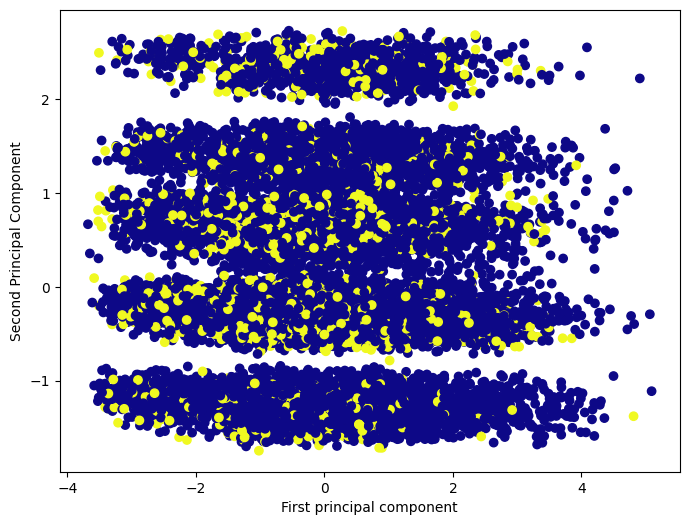

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df_subset['fraud'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 0)

In [136]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.8284507042253522

In [137]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.7526760563380281

In [138]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.8535211267605634

In [139]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = log_model.predict(X_test)
log_model.score(X_test, y_test)

0.8538028169014085

In [140]:
# interpreting the model

In [141]:
! pip install eli5

In [142]:
import eli5

In [143]:
feature_names = ['age_of_driver','gender','marital_status','annual_income','high_education_ind', 'address_change_ind', 'living_status', \
                    'accident_site','past_num_of_claims','witness_present_ind','channel','age_of_vehicle','vehicle_category']

In [144]:
# showing weight for the model

In [145]:
eli5.show_weights(log_model, feature_names = feature_names, target_names = y )

Weight?,Feature
+1.190,annual_income
+0.287,past_num_of_claims
+0.208,address_change_ind
+0.141,age_of_vehicle
+0.074,living_status
+0.017,vehicle_category
+0.010,channel
-0.151,gender
-0.208,marital_status
-0.280,witness_present_ind


In [ ]:
! pip install lime